# Ensemble Methods in credit carts data

<img src="image.jpg" style="width:500px;height:300px"/>

# Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls",header=1)
dataset.drop(["ID"],axis=1,inplace=True)
dataset.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
var_cat=["SEX","EDUCATION","MARRIAGE","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
var_num=["LIMIT_BAL",'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
var_ind= ['default payment next month']

In [4]:
import scipy
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Splitting data
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 23) (6000, 23) (24000,) (6000,)


In [6]:
#Data Preprocessing:

# Categorical -  one hot encode

cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, var_cat)]

In [10]:
# Numerical -  scale

num_scl_step = ('scl', MinMaxScaler())
num_steps = [ num_scl_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, var_num)]

In [11]:
# Pipeline

ct = ColumnTransformer(transformers=cat_transformers + num_transformers)
ct.fit(X_train)
X_train_tr = ct.transform(X_train)
X_test_tr = ct.transform(X_test)
print(X_train.shape)
print(X_train_tr.shape)
print(X_test.shape)
print(X_test_tr.shape)
     

(24000, 23)
(24000, 89)
(6000, 23)
(6000, 89)


# Decision Tree Classifier

In [93]:
# Fitting model

from sklearn.tree import DecisionTreeClassifier
from graphviz import Source
from sklearn import tree

tree_clf = DecisionTreeClassifier(max_depth=4, criterion='entropy', min_samples_leaf=2,random_state=0,min_samples_split=2)

tree_clf.fit(X_train_tr, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       random_state=0)

**SCoring**

In [94]:
# Scoring 
from sklearn.metrics import accuracy_score

y_pr = tree_clf.fit(X_train_tr, y_train).predict(X_test_tr)
print("Accuracy of DecisionTreeClassifier is: ",accuracy_score(y_test,y_pr))



Accuracy of DecisionTreeClassifier is:  0.824


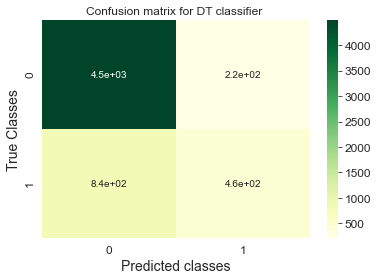

In [28]:
# Confution matrix
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import seaborn as sns
sns.set_style("whitegrid")


y_pr = tree_clf.fit(X_train_tr, y_train).predict(X_test_tr)
plt.title('Confusion matrix for DT classifier ')

sns.heatmap(confusion_matrix(y_test, y_pr), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()


**Trying different paramethers**

In [30]:
# Trying different values for parameters and see the result:(Each time, I changed one parameter)

tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy',min_samples_split=2, min_samples_leaf=2,random_state=0)
tree_clf.fit(X_train_tr, y_train)

# Changing max_depth
y_pr = tree_clf.fit(X_train_tr, y_train).predict(X_test_tr)
print("Accuracy of DecisionTreeClassifier is: ",accuracy_score(y_test,y_pr))

 # Decreasing max_depth to 2 causes the performance of the model to go down.Generally increasing the max_depth gives us a more complex model because it gets more split and more information.
 #But very high max_depth can make an overfitting problem, that the model can not generalize new data.On the other hand decreasing the max_deoth can cause very simple model and underfitting.
 #Finding the tradeoff between them is not easy . We can compare train score and test score to avoid over and underfitting.
 #Here it seems by lowering max_depth we have an underfitting problem.

Accuracy of DecisionTreeClassifier is:  0.8188333333333333


In [31]:
# train_score
# To see if the new model is underfit or overfit, I tried to compare train_score and test_score.
y_pr_train=tree_clf.fit(X_train_tr, y_train).predict(X_train_tr)
accuracy_score(y_train,y_pr_train) 

# Here is train_score that is lower than test_scor (0.8188333, the accuracy score of model).It can show a little underfitting.

0.8122083333333333

In [32]:
# Changing criterion

tree_clf = DecisionTreeClassifier(max_depth=4, criterion='gini',min_samples_split=2, min_samples_leaf=2,random_state=0)
                                 
tree_clf.fit(X_train_tr, y_train)

y_pr = tree_clf.fit(X_train_tr, y_train).predict(X_test_tr)
print("Accuracy of DecisionTreeClassifier is: ",accuracy_score(y_test,y_pr))

# Entropy and gini are two factors that measure the impurity and decide how much a node can split. They have close results ,however gini is faster, as Computation entropy is more complex.
# Entropy measurement needs to compute logarithmic functions.


Accuracy of DecisionTreeClassifier is:  0.8248333333333333


In [19]:
#Changing min_samples_split

tree_clf = DecisionTreeClassifier(max_depth=4, criterion='entropy',min_samples_split=2000, min_samples_leaf=2)
tree_clf.fit(X_train_tr, y_train)

y_pr = tree_clf.fit(X_train_tr, y_train).predict(X_test_tr)
print("Accuracy of DecisionTreeClassifier is: ",accuracy_score(y_test,y_pr))
# In low values for min_samples_split there is no difference in accuracy.For too high value of that we may face underfitting ,as the growing of trees is avoided.
#An empirical study on hyperparameter tuning of decision trees[5] the ideal min_samples_split values tend to be between 1 to 40 for the CART algorithm which is the algorithm implemented in scikit-learn.
#[5] Rafael Gomes Mantovani, Tomáš Horváth, Ricardo Cerri, Sylvio Barbon Junior, Joaquin Vanschoren, André Carlos Ponce de Leon Ferreira de Carvalho, “An empirical study on hyperparameter tuning of decision trees”
#arXiv:1812.02207

Accuracy of DecisionTreeClassifier is:  0.8221666666666667


In [21]:
# Again comparing train_score and teat_score showes underfitting ,as train_score is less than test_score

y_pr_train=tree_clf.fit(X_train_tr, y_train).predict(X_train_tr)
accuracy_score(y_train,y_pr_train) 


0.8131666666666667

In [23]:
tree_clf = DecisionTreeClassifier(max_depth=4, criterion='entropy',min_samples_split=2, min_samples_leaf=2000)
tree_clf.fit(X_train_tr, y_train)

y_pr = tree_clf.fit(X_train_tr, y_train).predict(X_test_tr)
print("Accuracy of DecisionTreeClassifier is: ",accuracy_score(y_test,y_pr))

#min_sample_leaf is the minimum number sample that is needed to  be at a leaf node.Increasing min_sample_leaf avoid growing tree and make underfitting.Learning curve, plotting different amounts of min_samples_leaf and accuracy, calculation of trai_score and hyperparameter tuning can be helpful ways to select appropriate one for that.
#We can say by min_sample_split and min_samples_leaf we can control the depth of a tree that causes model complexity, and combat underfitting or overfitting. 

Accuracy of DecisionTreeClassifier is:  0.8193333333333334


**Hyperparamethers**

In [24]:

# Hyperparameter
# I tried to optimize all the 4 parameters in question 1 ,but I didn't get better performance,so I chose 3 of them.I test different ranges for getting better accuracy.
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint

In [90]:


distribution={"max_depth":list(range(2,50)), "criterion":['entropy',"gini"],"min_samples_leaf":randint(1, 9)} 

clf=DecisionTreeClassifier()
rs=RandomizedSearchCV(clf,distribution,random_state=0,cv=7)
search=rs.fit(X_train_tr,y_train)

search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 7}

In [88]:
tree_clf2 = DecisionTreeClassifier(max_depth=3, criterion='entropy',min_samples_leaf=7)

tree_clf2.fit(X_train_tr, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7)

In [95]:
#Scoring after hyperparameter tuning

y_pr_3 = tree_clf2.fit(X_train_tr, y_train).predict(X_test_tr)
print("Accuracy of DecisionTreeClassifier after tuning  is: ",accuracy_score(y_test,y_pr_3))

# After doing hyperparameter tuning the accuracy score increased a little bit from 0.824 to 0.826
#It seems controlling the model by  max_depth=3, min_samples=7 caused a better score in comparison with max_depth=4,min_samples=2(first model,Q1).
# So we can say getting lower depth and more samples in each node help us to avoid overfitting somehow.

Accuracy of DecisionTreeClassifier after tuning  is:  0.8258333333333333


In [97]:
y_pr_train=tree_clf.fit(X_train_tr, y_train).predict(X_train_tr)
accuracy_score(y_train,y_pr_train) 

0.8194583333333333

# Random Forest Classifier

In [119]:

#Hyperparameter of RandomForestClassifier()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

distribution={"n_estimators":[5,10,20,50,70,100,150,200,250,300,350],"max_depth":list(range(2,20)), "criterion":['entropy',"gini"]}
              
clf=RandomForestClassifier()
rs=RandomizedSearchCV(clf,distribution,random_state=0)
search=rs.fit(X_train_tr,y_train)

search.best_params_

{'n_estimators': 50, 'max_depth': 11, 'criterion': 'gini'}

In [120]:

# Fitting RFC model

rnd_clf = RandomForestClassifier(n_estimators=50,criterion="gini",max_depth=11)
rnd_clf.fit(X_train_tr, y_train)

y_rf_pred = rnd_clf.predict(X_test_tr)
print(accuracy_score(y_test, y_rf_pred))


0.8276666666666667


# AdaBoosterClassifier

In [121]:
# Hyperparameter of AdaBoostClassifier()

from sklearn.ensemble import AdaBoostClassifier

distribution={"n_estimators":[5,10,20,50,70,100,150,200,250,300,350],"learning_rate":[0.5,1,1.5,2], "algorithm":['SAMME', 'SAMME.R']}
          
clf=AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7))
rs=RandomizedSearchCV(clf,distribution,random_state=0)
search=rs.fit(X_train_tr,y_train)

search.best_params_

{'n_estimators': 10, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}

In [122]:
#Fitting AdaBoost model
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, criterion='entropy',min_samples_leaf=7), n_estimators=10,algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train_tr, y_train)
y_ada_pred = ada_clf.predict(X_test_tr)
print(accuracy_score(y_test, y_ada_pred))

0.8263333333333334


# ExtraTreesClassifier

In [13]:
# Hyperparameter of ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

distribution={"n_estimators":[5,10,20,50,70,100,150,200,250,300,350],"max_depth":list(range(2,20)), "criterion":['entropy',"gini"]}
          
clf=ExtraTreesClassifier()
rs=RandomizedSearchCV(clf,distribution,random_state=0)
search=rs.fit(X_train_tr,y_train)

search.best_params_

{'n_estimators': 350, 'max_depth': 12, 'criterion': 'gini'}

In [15]:
# Fitting ExtraTrees model
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

forest = ExtraTreesClassifier(n_estimators=350,max_depth=11,criterion="gini")
forest.fit(X_train_tr, y_train)
y_ex_pred = forest.predict(X_test_tr)
print(accuracy_score(y_test, y_ex_pred))

0.8266666666666667


# GradientBoostingClassifier

In [12]:
# Hyperparameter of GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

distribution={"n_estimators":[5,10,20,50,70,100,150,200,250,300,350],"max_depth":list(range(2,20)),"learning_rate":[0.5,1,1.5,2] }
          
clf=GradientBoostingClassifier()
rs=RandomizedSearchCV(clf,distribution,random_state=0)
search=rs.fit(X_train_tr,y_train)

search.best_params_       


{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.5}

In [140]:
# Fitting GradientBoosting model
from sklearn.ensemble import GradientBoostingClassifier

gb_clf=GradientBoostingClassifier(n_estimators=50, learning_rate=0.5,max_depth= 3)
gb_clf.fit(X_train_tr,y_train)
     

y_gb_pred=gb_clf.predict(X_test_tr)
print(accuracy_score(y_test, y_gb_pred))

0.8238333333333333


# Learning Curve

In [128]:
#Learning curve RFC
from sklearn.model_selection import learning_curve
train_sizes=np.linspace(0.1,1, 20)
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(n_estimators=50,criterion="gini",max_depth=11),X_train_tr,y_train,cv=5,n_jobs=1,train_sizes=train_sizes)
                                                        
     
      

In [129]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


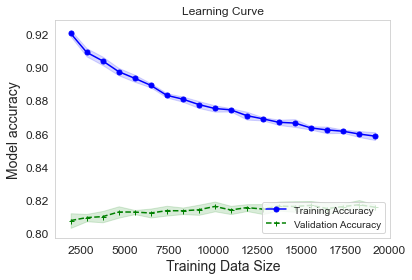

In [130]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()
# The big gap between training accuracy and validation accuracy and also low value of validation accuracy shows high variance(overfitting).
# That means the model works well on the training set but it is not able to generalize well on unseen data(test-data).
#Increasing training data size cannot be helpful, as the training score decreases and test_score will not have a big change.



In [133]:
#Learning curve of AdaBoost
train_sizes=np.linspace(0.1,1, 10)
model=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3, criterion='entropy',min_samples_leaf=7), n_estimators=10,algorithm="SAMME.R", learning_rate=0.5)
train_sizes, train_scores, test_scores = learning_curve(model,X_train_tr,y_train,cv=5,n_jobs=1,train_sizes=train_sizes)
                                                        
     
      
                                                        
     

In [134]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


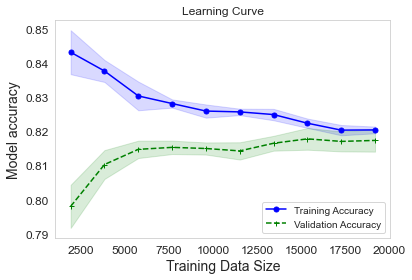

In [135]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()
# This learning curve represents a good model, as both train_score and test_score after 15000 training size have the same result that is not low and acceptable.
#Increasing training size will help test scores to increase.We can say models fit well on training sets and unseen data.


In [136]:
#Learning Curve of ExtraTrees

train_sizes=np.linspace(0.1,1, 10)
model=ExtraTreesClassifier(n_estimators=50,max_depth=11,criterion="gini")
train_sizes, train_scores, test_scores = learning_curve(model,X_train_tr,y_train,cv=5,n_jobs=1,train_sizes=train_sizes)

In [137]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

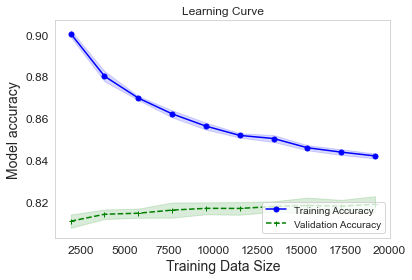

In [138]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()
# Because of the big gap between train score and test score, we can say there is overfitting here.
#Test score is lower than train score .
#Increasing training data set does not help the performance of the model.

In [141]:
# Learning Curve of GradientBoosting
train_sizes=np.linspace(0.1,1, 10)
model=GradientBoostingClassifier(n_estimators=50, learning_rate=0.5,max_depth= 3)
train_sizes, train_scores, test_scores = learning_curve(model,X_train_tr,y_train,cv=5,n_jobs=1,train_sizes=train_sizes)
                                                        
     
      

In [142]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

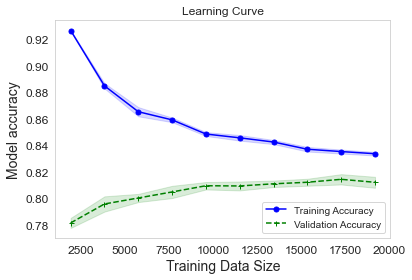

In [143]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()
# The gap between train-set and test set is not big ,so the model is slightly overfitting.
#Increasing training data size seems to help test score to increase,but steel train score is more than test score clearly.



In [ ]:
#Q4
#For decision tree model hyperparameters gave us the better result than the first try , but this performance is still less than the performance of ensemble models.
#The max_depth,min_samples_leaf and criterion were the parameters that search was done on them.The max_depth and min_samples_leaf are parameters that control the growth and complexity of the model.
#RandomizedsearchCV() function according to distribution of features and their spread select optimized values for parameters by cross validation.

#Ensemble models include a bagging and boosting method. Random forest uses a bagging method ,that means instead of one tree in the DecisionTree model we have some trees.
# In bagging technique each time(for each tree)we get some features and observations and fit to the model and get an output.Then we replace the data and randomly choose another subset of data.
# These steps are repeated some times and the final result is defined by the aggregate of outputs of all the trees.
# Bagging is also called bootstrap aggregate, which means we create different sets of data for learning in some models(trees) and after that we aggregate the result to find the final output.
# In contrast to DecisionTree that has low bias and high variance , RFC has lower variance. Because training different sets of data make models powerful for unseen data ,so we can get better scores.
# Other ensemble methods like Adaboost, Extra Trees and Gradientboosting improve the performance of the model in comparison to the single model(decision tree), but score of RFC is more.
# The reason for that can be in the boosting method we have a decision stump instead of numbers of full size trees that have just one depth(one node and two leaves). These one depth trees are called stumps.
# Actually the boosting is a forest of stumps not trees that are weak learners because they just use one variable to make a decision.
#Plus in RF each tree has equal vote on the final classification ,in contrast some stumps may get more say in the final classification than others.
#Adaboost combines multiple “weak classifiers” into a single “strong classifier”. 
#In gradient boosting ,the model applies a new predictor on the difference of incorrect output and correct ones not on total data.
# All of the points cause that RF has more performance here.